In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, norm, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sns




In [104]:
df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\1450_CvT\\Summary_data.xlsx', sheet_name = "Para_score")
#MCR_CtrlvTrt\\Para_Scores_Summary.xlsx
df.head()

,Label,sample,trt_time,orient,spectra_num,Class,Scores on Comp 3 (33.90%),Scores on Comp 4 (48.73%)
0,20250616,Ctrl,20mins,Para,1,20mins,0.018499,0.021895
1,20250616,Ctrl,20mins,Para,2,20mins,0.013944,0.026982
2,20250616,Ctrl,20mins,Para,3,20mins,0.008965,0.033946
3,20250616,Ctrl,20mins,Para,4,20mins,0.011515,0.032891
4,20250616,Ctrl,20mins,Para,6,20mins,0.003310,0.039670


In [112]:

data = []
for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 4 (48.73%)'])[1]}")
    tukey = pairwise_tukeyhsd(endog=dff['Scores on Comp 4 (48.73%)'],
                            groups=dff['sample'],
                            alpha=0.05
                            )
    #display results
    #print(f"Results for {x}")
    #print(tukey)
    #print('*****************************************************')
    data.append(pd.DataFrame(tukey.summary().data[1:], columns = tukey.summary().data[0]))

1.0290670824026846e-06
1.8348048130940007e-05
0.0003896100866520072
0.09377902967404979
0.0023063664757396207


In [113]:
stat_results = pd.concat(data).reset_index(drop=True).iloc[:13, :]
stat_results.insert(7, 'sig', value = ['**' if x < 0.01 else ('*' if x<0.05  else 'ns') for x in stat_results['p-adj']])
stat_results#.head()

,group1,group2,meandiff,p-adj,lower,upper,reject,sig
0,Ctrl,Trt,-0.0030,0.3690,-0.0096,0.0036,False,ns
1,Ctrl,Trt,-0.0027,0.4095,-0.0091,0.0038,False,ns
2,Ctrl,Trt,0.0003,0.8956,-0.0040,0.0046,False,ns
3,Ctrl,Trt,0.0002,0.9318,-0.0044,0.0048,False,ns
4,Ctrl,Trt,0.0017,0.3661,-0.0021,0.0055,False,ns


In [58]:
df['trt_time'].unique()

array(['20mins', '24h', '2mins', '40mins', '60mins', '20mins24h',
       '2mins24h', '40mins24h', '60mins24h'], dtype=object)

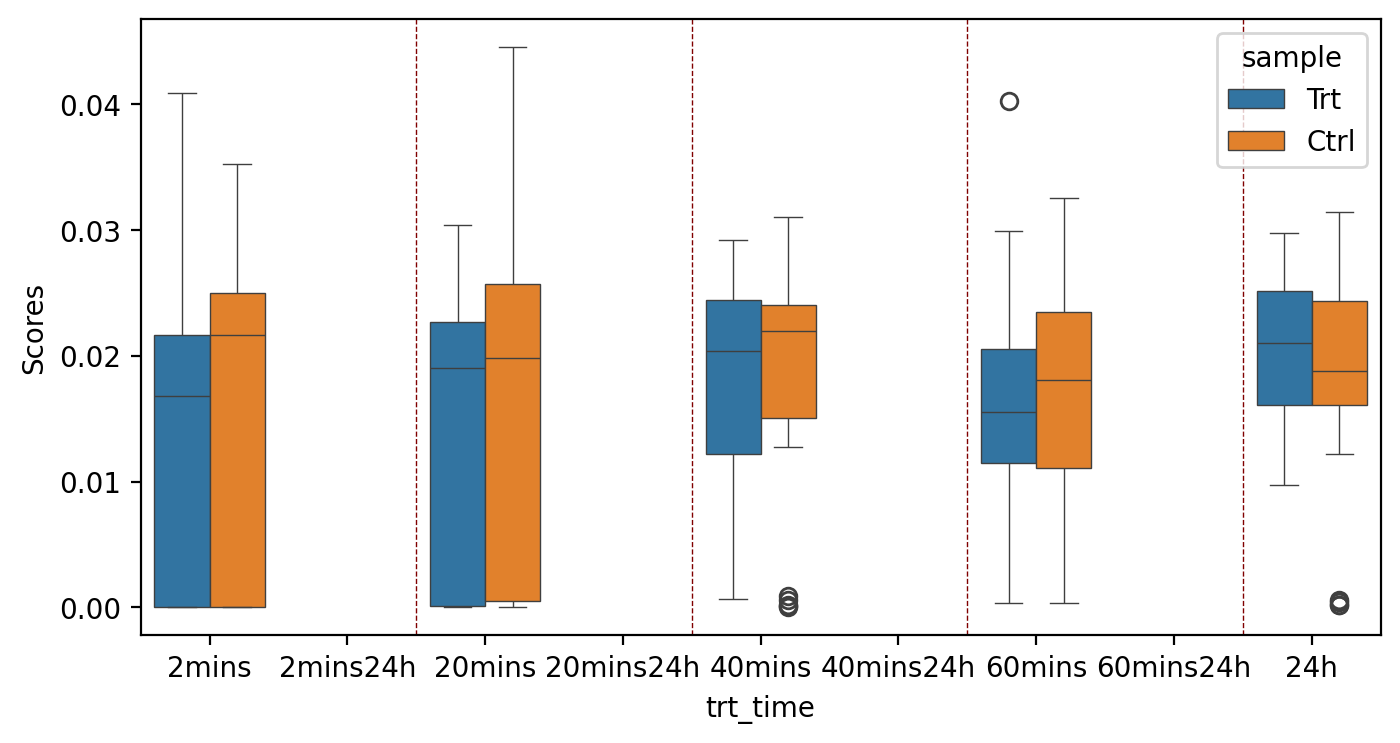

In [114]:
plt.figure(figsize = (8, 4), dpi = 200);
sns.boxplot(
    x = 'trt_time',
    y = 'Scores on Comp 4 (48.73%)',
    data = df,
    hue = 'sample',
    order = ['2mins', '2mins24h', '20mins', '20mins24h', '40mins', '40mins24h', '60mins', 
       '60mins24h','24h'],
       linewidth = .5,
       dodge=True,
       hue_order = ['Trt', 'Ctrl']
);
'''plt.xticks(position = [-0.25, 0, .5, 1, 2.5, 2,2.5, 4, 4.5, 5, 5.5, 6, 7.5, 8, 9.5, 10, 11.5, 12],
           labels= ['2mins', '2mins24h', '20mins', '20mins24h', '40mins', '40mins24h', ' ', '60mins', 
       '60mins24h',' ', '24h'],
           rotation = 45);'''

#plt.xticks([0.3]) 
#ax.set_xticks(positions)
plt.ylabel('Scores');
#plt.axvline(-0.25)
for l in [1.5, 3.5, 5.5, 7.5]:
    plt.axvline(l, ls = '--', color = 'maroon', lw = .5)

In [115]:
# for unequal variances
import pingouin as pg
data1 = []
for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 4 (48.73%)'])[1]}")
    tukey = pg.pairwise_gameshowell(
        data = dff,
        dv='Scores on Comp 4 (48.73%)',
                            between='sample'
                            ).round(3)
    #display results
    print(f"Results for {x}")
    print(tukey)
    print('*****************************************************')
    data1.append(tukey)

1.0290670824026846e-06
Results for 2mins
      A    B  mean(A)  mean(B)   diff     se      T      df   pval  hedges
0  Ctrl  Trt    0.016    0.013  0.003  0.003  0.905  57.955  0.369   0.231
*****************************************************
1.8348048130940007e-05
Results for 20mins
      A    B  mean(A)  mean(B)   diff     se      T      df   pval  hedges
0  Ctrl  Trt    0.017    0.014  0.003  0.003  0.837  58.043  0.406   0.208
*****************************************************
0.0003896100866520072
Results for 40mins
      A    B  mean(A)  mean(B)  diff     se      T      df   pval  hedges
0  Ctrl  Trt    0.019    0.019  -0.0  0.002 -0.133  56.307  0.895  -0.034
*****************************************************
0.09377902967404979
Results for 60mins
      A    B  mean(A)  mean(B)  diff     se      T      df   pval  hedges
0  Ctrl  Trt    0.016    0.016  -0.0  0.002 -0.086  58.139  0.932  -0.022
*****************************************************
0.0023063664757396207
Res

In [116]:
gh_stats = pd.concat(data1)
gh_stats.insert(10, 'sig', value = ['**' if x < 0.01 else ('*' if x<0.05  else 'ns') for x in gh_stats['pval']])

In [117]:
gh_stats

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,sig
0,Ctrl,Trt,0.016,0.013,0.003,0.003,0.905,57.955,0.369,0.231,ns
0,Ctrl,Trt,0.017,0.014,0.003,0.003,0.837,58.043,0.406,0.208,ns
0,Ctrl,Trt,0.019,0.019,-0.000,0.002,-0.133,56.307,0.895,-0.034,ns
0,Ctrl,Trt,0.016,0.016,-0.000,0.002,-0.086,58.139,0.932,-0.022,ns
0,Ctrl,Trt,0.019,0.020,-0.002,0.002,-0.911,51.471,0.367,-0.228,ns


In [87]:
df = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\MCR_CvT2\\Para_Scores.csv')#, sheet_name = "Sheet1")
#MCR_CtrlvTrt\\Para_Scores_Summary.xlsx
df.head()

,Label,Label.1,sample,trt_time,orient,spectra_num,details,Class,Scores on Comp 1 (3.16%),Scores on Comp 2 (35.28%),Scores on Comp 3 (10.33%),Scores on Comp 4 (49.93%),Q Residuals (1.30%),Q Residuals Reduced (p=0.950) (1.30%),KNN Score Distance (k=3)
0,NaN,20250616,Ctrl,20mins,Para,1,0616-Ctrl-20mins-Para,Ctrl,0.000194,0.578266,0.030310,0.391230,2.074749,0.274836,0.046902
1,NaN,20250616,Ctrl,20mins,Para,2,0616-Ctrl-20mins-Para,Ctrl,0.000180,0.525329,0.026295,0.448196,0.871580,0.115456,0.028521
2,NaN,20250616,Ctrl,20mins,Para,3,0616-Ctrl-20mins-Para,Ctrl,0.000300,0.427942,0.026830,0.544928,3.370301,0.446453,0.080342
3,NaN,20250616,Ctrl,20mins,Para,4,0616-Ctrl-20mins-Para,Ctrl,0.000235,0.465124,0.014162,0.520479,1.126241,0.149190,0.061708
4,NaN,20250616,Ctrl,20mins,Para,6,0616-Ctrl-20mins-Para,Ctrl,0.000222,0.312003,0.026229,0.661545,0.885682,0.117324,0.064830


In [88]:
tukey = pairwise_tukeyhsd(endog=df['Scores on Comp 2 (35.28%)'],
                            groups=df['Class'],
                            alpha=0.05
                            )
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  Ctrl    Trt  -0.0406 0.0003 -0.0622 -0.019   True
---------------------------------------------------
